Estimate, by simulation, the average number of lost sales per week for
an inventory system that functions as follows:
- Whenever the inventory level falls to or below 10 units, an order is placed. Only one order can be outstanding at a time.
- The size of each order is equal to 20 − I, where I is the inventory level when the order is placed.
- If a demand occurs during a period when the inventory level is zero, the sale is lost.
- Daily demand is normally distributed, with a mean of 5 units and a standard deviation of 1.5 units. (Round off demands to the closest integer during the simulation and, if a negative value results, give it a demand of zero.)
- Leadtime is distributed uniformly between zero and 5days—integers only.
- The simulation will start with 18 units in inventory. For simplicity, assume that orders are placed at the close of the business day and received after the lead time has occurred. Thus, if lead time is one day, the order is available for distribution on the morning of the second day of business following the placement of the order.
- Let the simulation run for 5 weeks

### In the above problem:
 - timeperiod is daily and need to simulate for 5 weeks
 - Daily demand follows normal distribution with 5 units and std of 1.5
 - New order to be placed when Inventory is below 10 units
 - Size of each order is 20-I
 - Lead time (Order delivery time) follows uniform distribution with zero and 5 days (int only)
 - Lost sales is order came when there is zero inventory

In [48]:
import simpy
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avgDemand=5
avgStd=1.5
numberofDays=7
initialinv=18
MaxLeadtime=5
MinLeadtime=0
RandomExperAvgSalesLost=[]
Inventory=0
orderFun=lambda x: abs(20-x)


def genDemand(avgDemand,avgStd):
    return int(np.random.normal(avgDemand,avgStd))

def genLeadtime():
    return int(np.random.uniform(MinLeadtime,MaxLeadtime))

## Program for one day

def dayProcess(env,InventoryJournal,DemandJournal):
    while True:
        today=env.now
        print(f"="*10)
        print("Day is started")
        print(f"The {today} day is started ...")
        # print(f"{InventoryJournal}")
        todayinv=InventoryJournal[today] if InventoryJournal[today]>=0 else 0
        demandPerday = genDemand(avgDemand,avgStd)
        # print(f"Today's demand of item is {demandPerday}")
        todayorder=0
        todayorderleadtime=0
        DemandJournal.append(demandPerday)
        netval=todayinv-demandPerday
        # if InventoryJournal[today+1]
        InventoryJournal[today+1] +=0 if netval<0 else netval
        if demandPerday>netval or todayinv<=10:
            #Raise order
            todayorder = orderFun(todayinv)
            todayorderleadtime= genLeadtime()
            # print(todayorderleadtime)
            InventoryJournal[today+todayorderleadtime] =InventoryJournal[today+todayorderleadtime] + todayorder
        if netval <=0 and demandPerday>0:
            print("Sale is Lost")
            salesLost.append(1)

        print(f"Day is ended")
        print(f"="*10)
        yield env.timeout(1) #for 1 day
for i in range(500):    
    FinalsalesLost=[]
    for week in range(5):
        InventoryJournal,DemandJournal,LeadTimeJournal,salesLost =[0]*(numberofDays+MaxLeadtime),[],[],[]
        env= simpy.Environment()
        InventoryJournal[0]=initialinv
        # print(InventoryJournal)
        env.process(dayProcess(env,InventoryJournal,DemandJournal))
        env.run(until=numberofDays)
        # print(DemandJournal)
        # print(InventoryJournal)
        # print(f"Total demand is {sum(DemandJournal)}")
        # print(f"Final Inventory is {InventoryJournal[numberofDays-1]}")
        # print(f"No of Sale lost due to stock out {sum(salesLost)}")
        FinalsalesLost.append(sum(salesLost))
    # print(f"Average Sales Lost in the experiement is {math.ceil(np.mean(FinalsalesLost))}")
    RandomExperAvgSalesLost.append(math.ceil(np.mean(FinalsalesLost)))
print(RandomExperAvgSalesLost[0:20])

Day is started
The 0 day is started ...
Day is ended
Day is started
The 1 day is started ...
Day is ended
Day is started
The 2 day is started ...
Day is ended
Day is started
The 3 day is started ...
Sale is Lost
Day is ended
Day is started
The 4 day is started ...
Sale is Lost
Day is ended
Day is started
The 5 day is started ...
Day is ended
Day is started
The 6 day is started ...
Day is ended
Day is started
The 0 day is started ...
Day is ended
Day is started
The 1 day is started ...
Day is ended
Day is started
The 2 day is started ...
Day is ended
Day is started
The 3 day is started ...
Sale is Lost
Day is ended
Day is started
The 4 day is started ...
Sale is Lost
Day is ended
Day is started
The 5 day is started ...
Day is ended
Day is started
The 6 day is started ...
Day is ended
Day is started
The 0 day is started ...
Day is ended
Day is started
The 1 day is started ...
Day is ended
Day is started
The 2 day is started ...
Day is ended
Day is started
The 3 day is started ...
Day is 

In [51]:
SampleMeans=[]
for i in range(50):
    SampleMeans.append(math.ceil(np.mean(np.random.choice(RandomExperAvgSalesLost,size=100))))
# print(SampleMeans)
pd.DataFrame(SampleMeans).describe().T

,count,mean,std,min,25%,50%,75%,max
0,50.0,2.02,0.141421,2.0,2.0,2.0,2.0,3.0


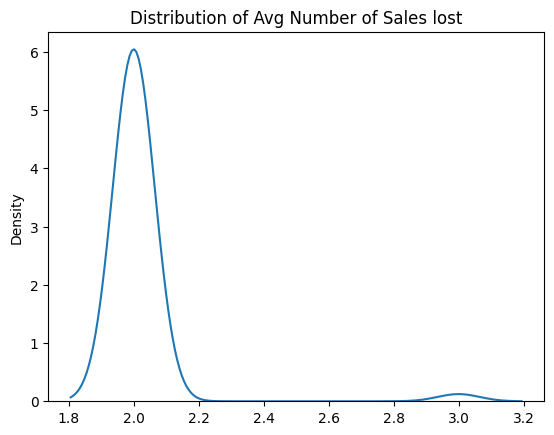

In [57]:
import seaborn as sns
sns.kdeplot(SampleMeans)
plt.title("Distribution of Avg Number of Sales lost")
plt.show()